# Ex1. Logistic Regression

# Import Libraries

In [ ]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, mean_absolute_error
from sklearn.linear_model import LogisticRegression, \
                                 LinearRegression, SGDRegressor

# Load Dataset to DataFrame

In [ ]:
df = pd.read_csv('sample_data/diabetes.csv')

# Print the first five rows of the data, just to take a look at the values.
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# Generate descriptive statistics of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Convert DataFrame to x (inputs), y (targets) arrays

In [ ]:
input_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
                 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
target_column = 'Outcome'

# keep the selected columns and convert to numpy arrays
x = df[input_columns].to_numpy()
y = df[target_column].to_numpy()

# Split Dataset to Train-Test

In [ ]:
# Split the data set into train (70%) and test (30%) data
# Use specific random_state for reproducibility of the returned results

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Create a Logistic Regression Model

In [ ]:
# Using the default parameter values, the solver failed to converge during
# the fit process (warning message).
# This can be avoided by
#    * using a different penalty and/or solver,
#    * scaling the features through normalization
#    * increasing the maximum number of iterations taken for the solvers to converge
# Here, we increased the maximum iteration number. Interestingly, the accuracy didn't change.

classifier = LogisticRegression(penalty='l2', random_state=0, max_iter=200)

# Train Model

In [ ]:
classifier.fit(x_train, y_train);

# Compute Diabetes Predictions

In [ ]:
y_pred = classifier.predict(x_test)

# Compute Model's Accuracy

In [ ]:
l2_lbfgs_accuracy = accuracy_score(y_test, y_pred)
print(l2_lbfgs_accuracy)

0.7792207792207793


# Investigate the impact of feature scaling



In [ ]:
# The convergence warning message disappears also by scaling the features.
# We tested several penalty and solver options using the scaled data.
# Here, we present the results derived using 'l2' penalty and the default solver.

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

classifier = LogisticRegression(penalty='l2', random_state=0)
classifier.fit(x_train_scaled, y_train);
y_pred = classifier.predict(x_test_scaled)
print(accuracy_score(y_test, y_pred))

# Since the accuracy does not change significantly in any case, we decided
# to use the non-scaled data in the following

0.7792207792207793


# Repeat with different solver



In [ ]:
# The convergence warning message disappears also by changing the solver to 'liblinear'.
# In addition, the accuracy is slightly improved.

classifier = LogisticRegression(penalty='l2', random_state=0, solver='liblinear')
classifier.fit(x_train, y_train);
y_pred = classifier.predict(x_test)
l2_liblinear_accuracy = accuracy_score(y_test, y_pred)
print(l2_liblinear_accuracy)

0.7835497835497836


# Repeat with l1 penalty



In [ ]:
# The resulted accuracy is the same for both 'l1' and 'l2' penalty when
# the solver is set to 'liblinear'.

classifier = LogisticRegression(penalty='l1', random_state=0, solver='liblinear')
classifier.fit(x_train, y_train);
y_pred = classifier.predict(x_test)
l1_liblinear_accuracy = accuracy_score(y_test, y_pred)
print(l1_liblinear_accuracy)

0.7835497835497836


# Repeat without penalty



In [ ]:
# The convergence warning appears again when no penalty is applied.
# So, the maximum number of iterations was increased again.

classifier = LogisticRegression(penalty=None, random_state=0, max_iter=200)
classifier.fit(x_train, y_train);
y_pred = classifier.predict(x_test)
no_penalty_accuracy = accuracy_score(y_test, y_pred)
print(no_penalty_accuracy)

0.7792207792207793


# Present results in a pandas dataframe



In [ ]:
results = pd.DataFrame({
    'penalty': ['None', 'l2', 'l2', 'l1'],
    'solver': ['lbfgs', 'lbfgs', 'liblinear', 'liblinear'],
    'accuracy': [no_penalty_accuracy, l2_lbfgs_accuracy, l2_liblinear_accuracy, l1_liblinear_accuracy]
})
results

,penalty,solver,accuracy
1,None,lbfgs,0.779221
2,l2,lbfgs,0.779221
3,l2,liblinear,0.783550
4,l1,liblinear,0.783550


# -- Answer The Question: --
# Which model is better:


*   A model that mostly predicts that a patient has no Diabetes, even though they have
*   A model that mostly predicts that a patient has diabetes, even though they don't have



In [ ]:
# We'll investigate the performance of our model by calculating the number of
# false positive (FP) and false negative (FN) predictions.

# We train again the model using the 'l2' penalty and the 'liblinear' solver,
# based on the accuracy investigation done previously
classifier = LogisticRegression(penalty='l2', random_state=0, solver='liblinear')
classifier.fit(x_train, y_train);
y_pred = classifier.predict(x_test)

# Calculate the number of FP and FN predictions
TP, FP, TN, FN = 0, 0, 0, 0

for i in range(len(y_pred)):
    if y_test[i]==y_pred[i]==1:
        TP += 1
    elif y_pred[i]==1 and y_test[i]!=y_pred[i]:
        FP += 1
    elif y_test[i]==y_pred[i]==0:
        TN += 1
    elif y_pred[i]==0 and y_test[i]!=y_pred[i]:
        FN += 1

# Calculate the FP and FN rates
FP_rate = FP / (FP + TN)
FN_rate = FN / (FN + TP)

print(f'Number of FP predictions: {FP}')
print(f'Number of FN predictions: {FN}')
print(f'FP rate: {100*FP_rate:.2f}%')
print(f'FN rate: {100*FN_rate:.2f}%')
print(f'Percentage of positive samples in the test set: {100*(FN + TP)/len(y_test):.2f}%')

Number of FP predictions: 15
Number of FN predictions: 35
FP rate: 9.55%
FN rate: 47.30%
Percentage of positive samples in the test set: 32.03%


More false negative (FN = 35) than false positive (FP = 15) predictions.  
The FN rate is \~47%, which is much larger compared to the FP rate (~9.6%).  
The FN rate is quite large also due to the fact that the data set is  slightly imbalanced, since 30% of  
the test samples correspond to a class of 1 (smaller denominator in FN rate compared to FP rate).  

The model mostly predicts that a patient has not diabetes even though they have.  

Patients with FP results in disease diagnostic testing may be exposed to further tests and/or  
unnecessary treatment and emotional trauma.  

On the other hand, FN results may lead to false reassurance, not performing further necessary  
testing and failure to initiate therapy. This may result in worsening of the disease and even death  
in the worst-case scenario.  

Considering the above, not predicting that a patient has diabetes even though they have seems to be worse.

# Repeat same process for ages:



*   0-40
*   41-100



In [ ]:
# We use the last trained model with 'l2' penalty and 'liblinear' solver.

# Make predictions and calculate the accuracy for the 0-40 age group
x_test_0_40 = x_test[(x_test[:,-1] <= 40)]
y_test_0_40 = y_test[(x_test[:,-1] <= 40)]
y_pred_0_40 = classifier.predict(x_test_0_40)
accuracy_0_40 = accuracy_score(y_test_0_40, y_pred_0_40)
print(f'Accuracy for 0-40 age group: {accuracy_0_40:.2f}')

# Make predictions and calculate the accuracy for ages 41+
x_test_41_ = x_test[(x_test[:,-1] > 40)]
y_test_41_ = y_test[(x_test[:,-1] > 40)]
y_pred_41_ = classifier.predict(x_test_41_)
accuracy_41_ = accuracy_score(y_test_41_, y_pred_41_)
print(f'Accuracy for ages 41+: {accuracy_41_:.2f}')

Accuracy for 0-40 age group: 0.78
Accuracy for ages 41+: 0.81


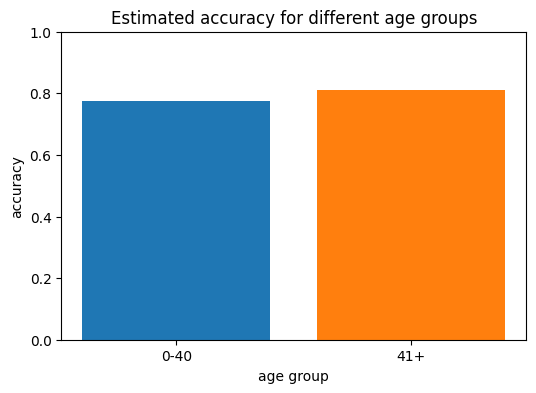

In [ ]:
# Present the derived accuracy for both groups in a bar plot
fig = plt.figure(figsize=(6, 4))
bar_colors = ['tab:blue', 'tab:orange']
plt.bar(['0-40', '41+'], [accuracy_0_40, accuracy_41_], color=bar_colors)
plt.yticks(np.arange(0, 1.1, .2))
plt.ylabel('accuracy')
plt.xlabel('age group')
plt.title('Estimated accuracy for different age groups');

The accuracy for both age groups is quite similar, with the accuracy for ages 41+ being only slightly better.

In [ ]:
# Investigate the FP and FN predictions for the 0-40 age group

TP, FP, TN, FN = 0, 0, 0, 0

for i in range(len(y_pred_0_40)):
    if y_test_0_40[i]==y_pred_0_40[i]==1:
        TP += 1
    elif y_pred_0_40[i]==1 and y_test_0_40[i]!=y_pred_0_40[i]:
        FP += 1
    elif y_test_0_40[i]==y_pred_0_40[i]==0:
        TN += 1
    elif y_pred_0_40[i]==0 and y_test_0_40[i]!=y_pred_0_40[i]:
        FN += 1

FP_rate = FP / (FP + TN)
FN_rate = FN / (FN + TP)

print(f'Number of FP predictions: {FP}')
print(f'Number of FN predictions: {FN}')
print(f'FP rate: {100*FP_rate:.2f}%')
print(f'FN rate: {100*FN_rate:.2f}%')
print(f'Percentage of positive samples in the test set: \
{100*(FN + TP)/len(y_test_0_40):.2f}%')

x_train_0_40 = x_train[(x_train[:,-1] <= 40)]
y_train_0_40 = y_train[(x_train[:,-1] <= 40)]
print(f'Percentage of positive samples in the train set: \
{100 * len([y for y in y_train_0_40 if y]) / len(y_train_0_40):.2f}%')

Number of FP predictions: 11
Number of FN predictions: 29
FP rate: 8.59%
FN rate: 58.00%
Percentage of positive samples in the test set: 28.09%
Percentage of positive samples in the train set: 29.29%


In [ ]:
# Investigate the FP and FN predictions for ages 41+

TP, FP, TN, FN = 0, 0, 0, 0

for i in range(len(y_pred_41_)):
    if y_test_41_[i]==y_pred_41_[i]==1:
        TP += 1
    elif y_pred_41_[i]==1 and y_test_41_[i]!=y_pred_41_[i]:
        FP += 1
    elif y_test_41_[i]==y_pred_41_[i]==0:
        TN += 1
    elif y_pred_41_[i]==0 and y_test_41_[i]!=y_pred_41_[i]:
        FN += 1

FP_rate = FP / (FP + TN)
FN_rate = FN / (FN + TP)

print(f'Number of FP predictions: {FP}')
print(f'Number of FN predictions: {FN}')
print(f'FP rate: {100*FP_rate:.2f}%')
print(f'FN rate: {100*FN_rate:.2f}%')
print(f'Percentage of positive samples in the test set: \
{100*(FN + TP)/len(y_test_41_):.2f}%')

x_train_41_ = x_train[(x_train[:,-1] > 40)]
y_train_41_ = y_train[(x_train[:,-1] > 40)]
print(f'Percentage of positive samples in the train set: \
{100 * len([y for y in y_train_41_ if y]) / len(y_train_41_):.2f}%')

Number of FP predictions: 4
Number of FN predictions: 6
FP rate: 13.79%
FN rate: 25.00%
Percentage of positive samples in the test set: 45.28%
Percentage of positive samples in the train set: 55.32%


The performance of the model seems to be much better for the age group of 41+ in the case of  
the samples positive for diabetes compared to the 0-40 group.  

For the group 40+, the number of FP and FN predictions are comparable (4 and 6, respectively).  
Whereas, for the 0-40 group, the number of FN (29) is almost three times the FP number (11),  
with the FN rate being quite large (58%).

The reason for the good performance of the model for the 41+ group is that the data set used for  
training is more balanced for the ages 41+ with the positive cases (class of 1) being about half  
of the total number of samples (~55%).
In the case of 0-40 ages, the training data set is quite  
imbalanced, with positive cases of about 29% of the total sample size.
So, the model has been  
trained to predict more accurately the positive class for ages >40 compared to the other group.

# Ex2. Linear Regression

# Select Corresponding Features for this task

In [ ]:
input_columns = ['Pregnancies', 'BMI', 'Age']
target_column = 'BloodPressure'

# Split Dataset to x, y

In [ ]:
# keep the selected columns and convert to numpy arrays

x = df[input_columns].to_numpy()
y = df[target_column].to_numpy()

# Split Dataset to Train-Test

In [ ]:
# Split the data set into train (70%) and test (30%) data
# Use specific random_state for reproducibility of the returned results

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

# Compute BloodPressure Predictions

In [ ]:
# instantiate a linear regression model
regressor = LinearRegression()

# train the model
regressor.fit(x_train, y_train)

# predict BloodPressure
y_pred = regressor.predict(x_test)

# Measure MAE

In [ ]:
# Compute the Mean Absolute Error for the predicted values
mae = mean_absolute_error(y_test, y_pred)
print(f'The Mean Absolute Error of the Linear Regression Model is {mae:.3f}')

The Mean Absolute Error of the Linear Regression Model is 10.923


# Investigate BloodPressure distribution

In [ ]:
# Calculate the mean and STD values of Bloodpressure for the train set
y_train_mean = np.round(np.mean(y_train), 3)
y_train_std = np.round(np.std(y_train), 3)
print(f'The mean and STD values of BloodPressure in the train set are \
{y_train_mean} and {y_train_std}, respectively.')

# Calculate the mean and STD values of Bloodpressure for the test set
y_test_mean = np.round(np.mean(y_test), 3)
y_test_std = np.round(np.std(y_test), 3)
print(f'The mean and STD values of BloodPressure in the test set are \
{y_test_mean} and {y_test_std}, respectively.')

The mean and STD values of BloodPressure in the train set are 69.667 and 19.447, respectively.
The mean and STD values of BloodPressure in the test set are 67.801 and 19.037, respectively.


In [ ]:
# Calculate the probability density function (PDF) assuming normal
# distribution for the BloodPressure for both train and test sets

pdf_train = stats.norm.pdf(np.sort(y_train), y_train_mean, y_train_std)
pdf_test = stats.norm.pdf(np.sort(y_test), y_test_mean, y_test_std)

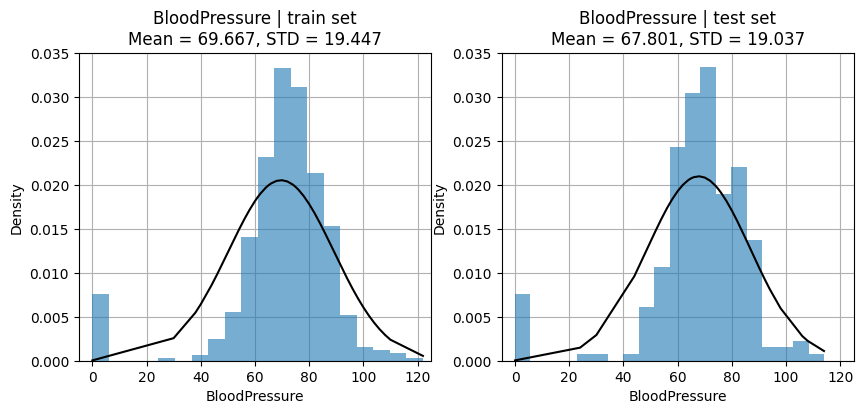

In [ ]:
# Plot the BloodPressure distribution for both train and test sets along
# with the estimated normal PDFs

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

ax1.hist(y_train, bins=20, density=True, alpha=0.6)
ax1.plot(np.sort(y_train), pdf_train, color='k')
ax1.set_xlim(-5, 125)
ax1.set_ylim(0, .035)
ax1.set_xlabel('BloodPressure')
ax1.set_ylabel('Density')
ax1.title.set_text(f'BloodPressure | train set\nMean = {y_train_mean}, STD = {y_train_std}')
ax1.grid()
ax1.set_axisbelow(True)


ax2.hist(y_test, bins=20, density=True, alpha=0.6)
ax2.plot(np.sort(y_test), pdf_test, color='k')
ax2.set_xlim(-5, 125)
ax2.set_ylim(0, .035)
ax2.set_xlabel('BloodPressure')
ax2.set_ylabel('Density')
ax2.title.set_text(f'BloodPressure | test set\nMean = {y_test_mean}, STD = {y_test_std}')
ax2.grid()
ax2.set_axisbelow(True)

Both the train and test sets follow a distribution close to normal with similar mean value and standard deviation. Some outliers close to 0 are seen for both data sets. This similarity is expected since both data sets are random subsets of the same initial data set.

# Construct Scatter Plot for each Feature + Regression Line

In [ ]:
# Calculate regression line coefficients for the target variable (BloodPressure)
# against each feature (Age, BMI, Pregnancies).
# We can use the scikit-learn LinearRegression model or any other library function
# that does such calculations, such as the numpy polyfit.

age = x_train[:,-1]
age_regressor = LinearRegression()
age_regressor.fit(age.reshape(-1, 1), y_train)
y_fitted_4_age = age_regressor.coef_[0] * np.sort(age) + age_regressor.intercept_

bmi = x_train[:,1]
bmi_regressor = LinearRegression()
bmi_regressor.fit(bmi.reshape(-1, 1), y_train)
y_fitted_4_bmi = bmi_regressor.coef_[0] * np.sort(bmi) + bmi_regressor.intercept_

pregnancies = x_train[:,0]
pregnancies_regressor = LinearRegression()
pregnancies_regressor.fit(pregnancies.reshape(-1, 1), y_train)
y_fitted_4_pregnancies = pregnancies_regressor.coef_[0] * np.sort(pregnancies) \
                       + pregnancies_regressor.intercept_

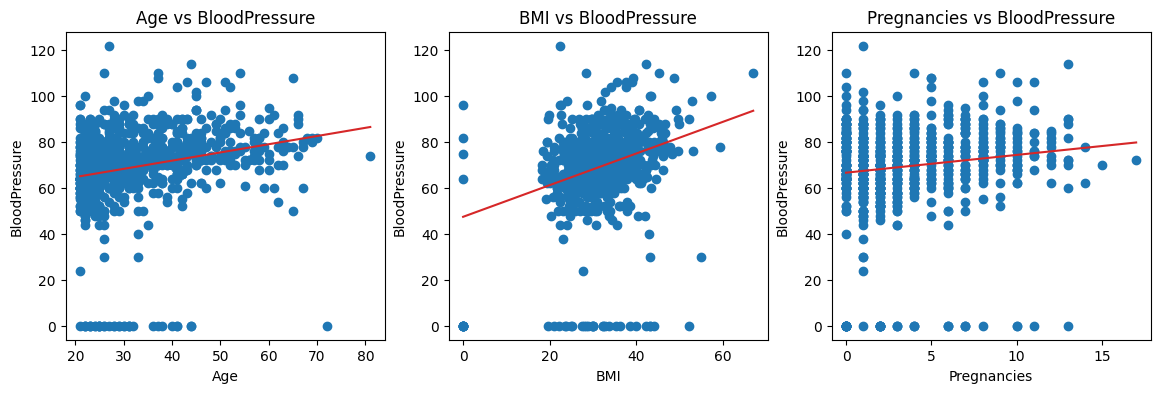

In [ ]:
# Plot the BloodPressure variable against each feature used to train the model

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

ax1.scatter(df['Age'], df['BloodPressure']);
ax1.plot(np.sort(age), y_fitted_4_age, color='tab:red')
ax1.set_ylabel('BloodPressure')
ax1.set_xlabel('Age')
ax1.title.set_text(f'Age vs BloodPressure')

ax2.scatter(df['BMI'], df['BloodPressure']);
ax2.plot(np.sort(bmi), y_fitted_4_bmi, color='tab:red')
ax2.set_ylabel('BloodPressure')
ax2.set_xlabel('BMI')
ax2.title.set_text(f'BMI vs BloodPressure')

ax3.scatter(df['Pregnancies'], df['BloodPressure']);
ax3.plot(np.sort(pregnancies), y_fitted_4_pregnancies, color='tab:red')
ax3.set_ylabel('BloodPressure')
ax3.set_xlabel('Pregnancies')
ax3.title.set_text(f'Pregnancies vs BloodPressure')

# Compute BloodPressure Predictions using Stochastic Gradient Descent (SGD)

In [ ]:
# Instantiate and train the SGD model and predict BloodPressure
regressor = SGDRegressor(loss='squared_error', penalty='l2', tol=1e-3, random_state=0,
                         learning_rate='constant', eta0=0.01)
regressor.fit(x_train, y_train)
y_pred_sgd_l2 = regressor.predict(x_test)

# Compute MAE for SGD predictions
mae_sgd_l2 = mean_absolute_error(y_test, y_pred_sgd_l2)
print(f'The Mean Absolute Error of the SGD Model is {mae_sgd_l2:.3e}')

# We print the 5 first predictions
# The predicted values are much larger compared to the true values of BloodPressure
print(f'First 5 predictions: {y_pred_sgd_l2[:5]}')

# The estimated fit coefficients and intercept are also large
print(f'Estimated coefficients: {regressor.coef_}')
print(f'Estimated intercept: {regressor.intercept_}')

The Mean Absolute Error of the SGD Model is 1.872e+12
First 5 predictions: [-3.79066235e+12 -1.80750595e+12 -1.11985088e+12  4.32382015e+12
  4.48995659e+11]
Estimated coefficients: [ 2.32326455e+11 -1.72560932e+11  1.46013266e+11]
Estimated intercept: [1.67583336e+11]


In [ ]:
# Stochastic Gradient Descent is very sensitive to feature scaling.
# That's the reason for the huge MAE and the meaningless predictions above.
# In the following we normalize the feature data and then we apply SGD.
# The predictions are significantly improved.

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

regressor = SGDRegressor(loss='squared_error', penalty='l2', tol=1e-3, random_state=0,
                         learning_rate='constant', eta0=0.01)
regressor.fit(x_train_scaled, y_train)
y_pred_sgd_l2 = regressor.predict(x_test_scaled)

mae_sgd_l2 = mean_absolute_error(y_test, y_pred_sgd_l2)
print(f'The Mean Absolute Error of the SGD Model is {mae_sgd_l2:.3f}')
print(f'First 5 predictions: {y_pred_sgd_l2[:5]}')
print(f'Estimated coefficients: {regressor.coef_}')
print(f'Estimated intercept: {regressor.intercept_}')

The Mean Absolute Error of the SGD Model is 10.981
First 5 predictions: [72.13601862 65.85443569 67.6891152  71.71982801 61.2943312 ]
Estimated coefficients: [1.31529143 6.08272071 4.54686999]
Estimated intercept: [69.59809337]


# Repeat using different penalty options

In [ ]:
# using penalty 'l1'

regressor = SGDRegressor(loss='squared_error', penalty='l1', tol=1e-3, random_state=0,
                         learning_rate='constant', eta0=0.01)
regressor.fit(x_train_scaled, y_train)
y_pred_sgd_l1 = regressor.predict(x_test_scaled)

mae_sgd_l1 = mean_absolute_error(y_test, y_pred_sgd_l1)

In [ ]:
# using penalty 'elasticnet'

regressor = SGDRegressor(loss='squared_error', penalty='elasticnet', tol=1e-3,
                         random_state=0, learning_rate='constant', eta0=0.01)
regressor.fit(x_train_scaled, y_train)
y_pred_sgd_elasticnet = regressor.predict(x_test_scaled)

mae_sgd_elasticnet = mean_absolute_error(y_test, y_pred_sgd_elasticnet)

In [ ]:
# without penalty

regressor = SGDRegressor(loss='squared_error', penalty=None, tol=1e-3, random_state=0,
                         learning_rate='constant', eta0=0.01)
regressor.fit(x_train_scaled, y_train)
y_pred_sgd_no_penalty = regressor.predict(x_test_scaled)

mae_sgd_no_penalty = mean_absolute_error(y_test, y_pred_sgd_no_penalty)

# Present results as a pandas dataframe

In [ ]:
results = pd.DataFrame({'penalty': ['l2',
                                    'l1',
                                    'elasticnet',
                                    'None'],
                        'MAE': [mae_sgd_l2,
                                mae_sgd_l1,
                                mae_sgd_elasticnet,
                                mae_sgd_no_penalty]},
                        index=[1, 2, 3, 4])
results

,penalty,MAE
1,l2,10.981086
2,l1,10.980958
3,elasticnet,10.981066
4,None,10.981147


The estimated Mean Absolute Errors for the BloodPressure predictions using SGD model  
with different regularization terms are very similar.  
This may be attributed to the fact that the features have been scaled.  
The MAE estimated for the Linear Regression model predictions (10.923) is only slightly lower.